In [3]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset

# Load Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df ['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [5]:
df_UK = df[df['job_country'] == 'United Kingdom'].copy()
df_UK['job_posted_month'] = df_UK['job_posted_date'].dt.strftime('%B')
df_UK_pivot = df_UK.pivot_table(index='job_posted_month', columns='job_title_short', aggfunc='size')
df_UK_pivot = df_UK_pivot.reset_index()
df_UK_pivot['job_posted_month_number'] = pd.to_datetime(df_UK_pivot['job_posted_month'], format='%B').dt.month
df_UK_pivot = df_UK_pivot.sort_values('job_posted_month_number')
df_UK_pivot = df_UK_pivot.set_index('job_posted_month')
df_UK_pivot = df_UK_pivot.drop(columns='job_posted_month_number')

df_UK_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
January,46,3,1467,1253,1142,8,169,347,326,20
February,23,4,1051,1009,859,10,140,301,212,10
March,47,5,712,789,699,8,91,224,179,19
April,29,7,561,611,519,8,63,155,123,18
May,23,1,614,645,486,11,60,227,153,16
June,14,2,736,862,636,3,102,292,154,4
July,38,5,892,960,646,13,116,321,184,12
August,22,7,610,863,657,15,96,247,181,13
September,111,32,1112,1191,898,51,139,320,221,116


In [6]:
pd.read_csv('https://lukeb.co/software_csv')

,job_posted_month,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
0,January,13619,9827,5108,4348
1,February,11456,9116,7298,4284
2,March,11102,8178,5814,4159
3,April,14037,9209,7232,4220
4,May,12126,8864,6718,4980
5,June,12003,8065,5902,4781
6,July,11914,8061,6839,4344
7,August,11571,8191,7413,4104
8,September,14016,8447,6139,4094
9,October,11419,8476,5026,4389


In [8]:
df_UK_software_pivot = pd.read_csv('https://lukeb.co/software_csv', index_col='job_posted_month')

df_UK_software_pivot

,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
job_posted_month,,,,
January,13619,9827,5108,4348
February,11456,9116,7298,4284
March,11102,8178,5814,4159
April,14037,9209,7232,4220
May,12126,8864,6718,4980
June,12003,8065,5902,4781
July,11914,8061,6839,4344
August,11571,8191,7413,4104
September,14016,8447,6139,4094


In [9]:
df_UK_pivot.merge(df_UK_software_pivot, on='job_posted_month')

,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
job_posted_month,,,,,,,,,,,,,,
January,46,3,1467,1253,1142,8,169,347,326,20,13619,9827,5108,4348
February,23,4,1051,1009,859,10,140,301,212,10,11456,9116,7298,4284
March,47,5,712,789,699,8,91,224,179,19,11102,8178,5814,4159
April,29,7,561,611,519,8,63,155,123,18,14037,9209,7232,4220
May,23,1,614,645,486,11,60,227,153,16,12126,8864,6718,4980
June,14,2,736,862,636,3,102,292,154,4,12003,8065,5902,4781
July,38,5,892,960,646,13,116,321,184,12,11914,8061,6839,4344
August,22,7,610,863,657,15,96,247,181,13,11571,8191,7413,4104
September,111,32,1112,1191,898,51,139,320,221,116,14016,8447,6139,4094


In [10]:
df_UK_merged = df_UK_pivot.merge(df_UK_software_pivot, on='job_posted_month')

In [15]:
top_5 = (
    df_UK_merged
    .sum()
    .sort_values(ascending=False)
    .head()
    .index # get the index of the top 5
    .to_list()
    )

top_5

['Front-End Developer',
 'Back-End Developer',
 'Full-Stack Developer',
 'UI/UX Designer',
 'Data Engineer']

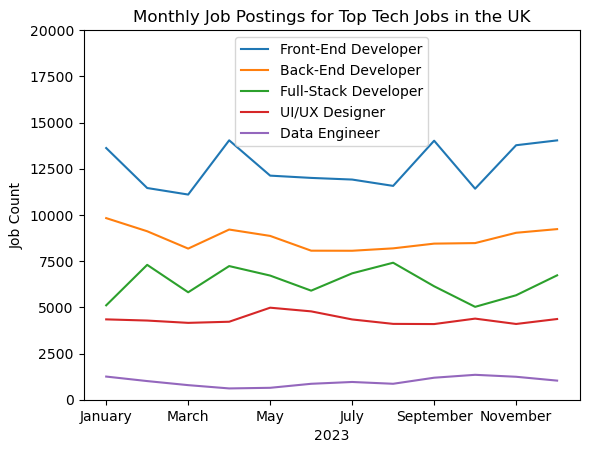

In [18]:
df_UK_merged[top_5].plot(kind='line')
plt.ylabel('Job Count')
plt.xlabel('2023')
plt.title('Monthly Job Postings for Top Tech Jobs in the UK')
plt.ylim(0, 20000)
plt.legend()
plt.show()